In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Myntra Fasion Clothing.csv')

C:\Users\Vikas Velmurugan\AppData\Local\Temp\ipykernel_15760\252152196.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Myntra Fasion Clothing.csv')


In [3]:
data.shape

(526564, 13)

In [4]:
data.head()

##product level information

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [7]:
data.skew(axis=0,skipna=True)

C:\Users\Vikas Velmurugan\AppData\Local\Temp\ipykernel_15760\3374440273.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew(axis=0,skipna=True)


Product_id              -2.004455
DiscountPrice (in Rs)    5.210154
OriginalPrice (in Rs)    4.506536
Ratings                 -1.516243
Reviews                  4.049217
dtype: float64

In [8]:
data['DiscountOffer'].unique()

array(['45% OFF', '55% OFF', '31% OFF', ..., 'Rs. 334 OFF', 'Rs. 375 OFF',
       'Rs. 283 OFF'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


In [6]:
# category, ind. category, cat by gender, brand name -> categorical
# discount can be converted to numerical 

In [7]:
data.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

In [8]:
# discount price
# if original price and discount percentage -> do maths and calculate
# but discount offer has 74k missing records. So we fill discount offer first
# and then we can do the maths

# rating and reviews-> mean or median depending on distribution

In [11]:
##percentage of missing data in rating and review
(336152/data.shape[0])*100

#63% of missing data!

63.83877363435404

In [13]:
data.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews'],
      dtype='object')

In [19]:
data=data.dropna()

In [20]:
## checking how many unique brands are there
print(f"{data.BrandName.nunique()} unique brands are present in the data.")

1252 unique brands are present in the data.


<AxesSubplot:>

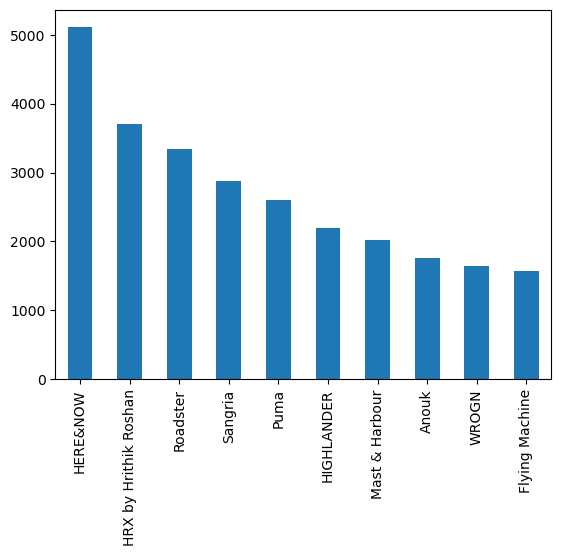

In [23]:
# most popular brands-> top 10 
data.BrandName.value_counts().head(10).plot(kind='bar')

## top brand is here and now

In [24]:
# least popular brands- last 10
data.BrandName.value_counts().tail(10)

araaliya           1
The Mini NEEDLE    1
Karmic Vision      1
BEATITUDE          1
FLAVIDO            1
SHARAA ETHNICA     1
AMOSIO             1
Mark Leute         1
ONLY               1
Donald Duck        1
Name: BrandName, dtype: int64

<AxesSubplot:>

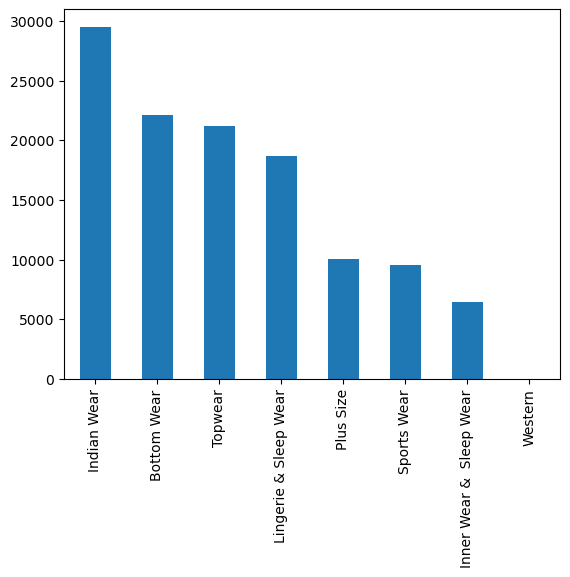

In [26]:
## analysing category
data.Category.value_counts().head(10).plot(kind='bar')

#the top category is indian wear

<AxesSubplot:>

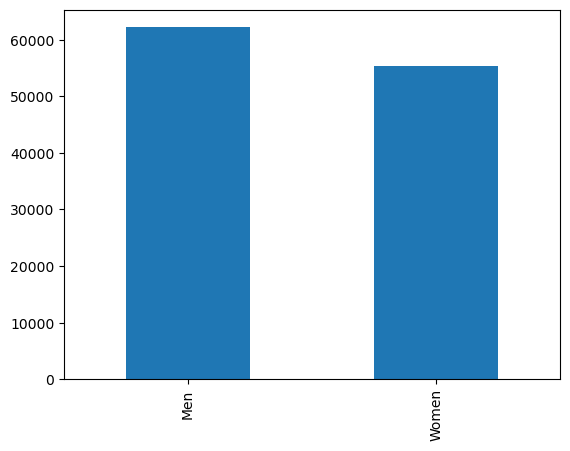

In [29]:
## category by gender

data.category_by_Gender.value_counts().head().plot(kind='bar')

#more categories for men

<AxesSubplot:>

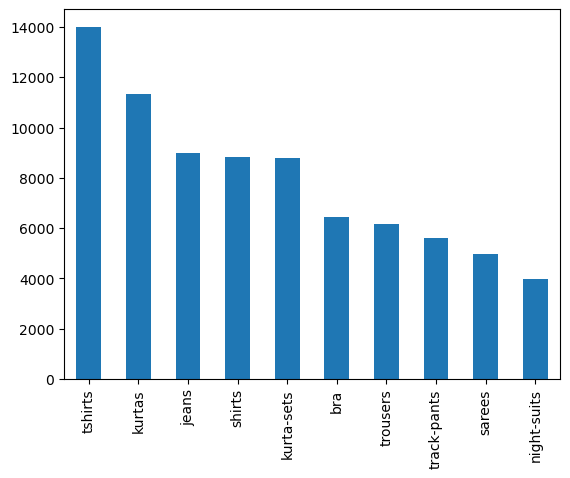

In [33]:
data.Individual_category.value_counts().head(10).plot(kind='bar')

## tshirts have the highest number

In [34]:
# nlp can be performed on description column to get more information

C:\Users\Vikas Velmurugan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DiscountPrice (in Rs)', ylabel='Density'>

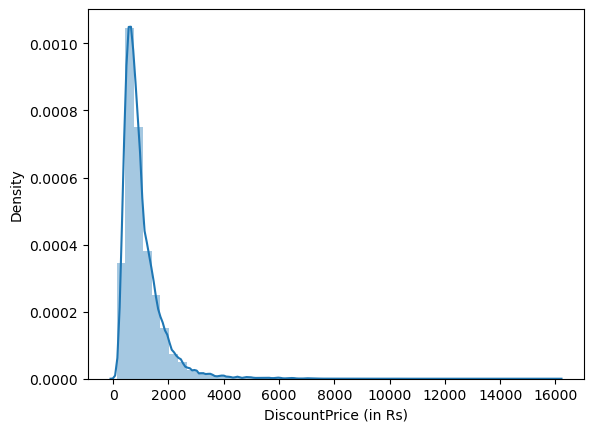

In [38]:
## discount price
sns.distplot(data['DiscountPrice (in Rs)'])

#### right skewed and presence of outliers
#### max values seem to range from 0 to approx 25k

C:\Users\Vikas Velmurugan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiscountPrice (in Rs)'>

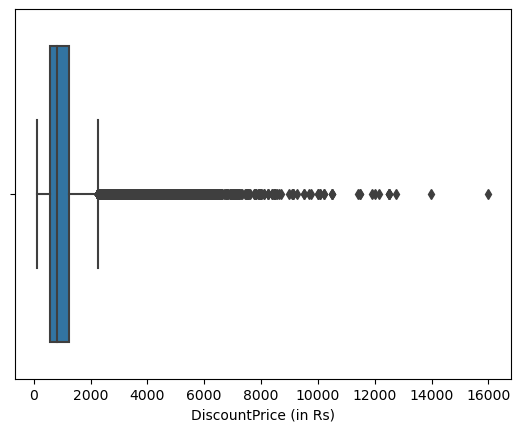

In [41]:
# sns.boxplot(data=data,x='DiscountPrice (in Rs)')
sns.boxplot(data['DiscountPrice (in Rs)'])

In [44]:
## Finding IQR

Q1 = np.percentile(data['DiscountPrice (in Rs)'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data['DiscountPrice (in Rs)'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

## upper and lower whisker
up_wh=Q3+1.5*IQR
lo_wh=Q1-1.5*IQR  

In [46]:
print(up_wh,lo_wh)

2264.0 -424.0


In [91]:
## replacing outliers with lower and upper whisker accordingly
data['DiscountPrice (in Rs)']=np.where(data['DiscountPrice (in Rs)']>up_wh,up_wh,np.where(data['DiscountPrice (in Rs)']<lo_wh,lo_wh,data['DiscountPrice (in Rs)']))

In [ ]:
## do for original price, ratings and reviews

In [50]:
data['DiscountOffer'].value_counts()

## we can see that we have both % OFF and Rs. OFF. 
# we can create a new column with one type and then filter out OFF
## This is called Feature Engineering

50% OFF         13250
60% OFF         11751
40% OFF          8857
55% OFF          8240
65% OFF          7607
                ...  
Rs. 449 OFF         1
Rs. 4700 OFF        1
Rs. 2184 OFF        1
Rs. 925 OFF         1
Rs. 409 OFF         1
Name: DiscountOffer, Length: 797, dtype: int64

In [62]:
## creating a new column discount price
# case 1 -> percentage discount -> calculate discount price from original and put it
# case-2-> discount price_> put as it is

## we can build logic using the split function

'''
list1=[]
for i in data['DiscountOffer']:
    if len(i.split())==2:
        list1.append(i.split()[0][0:-1])
    else:
        list1.append(i.split()[1])
list1
'''

['45',
 '55',
 '55',
 '31',
 '60',
 '55',
 '70',
 '53',
 '59',
 '55',
 'OFF,',
 '51',
 '45',
 '45',
 '60',
 '50',
 '65',
 '60',
 '40',
 '60',
 '60',
 '55',
 '53',
 '65',
 '53',
 '30',
 '65',
 '35',
 '60',
 '45',
 '45',
 '75',
 'OFF,',
 '75',
 '45',
 '50',
 '71',
 '25',
 '55',
 '55',
 '53',
 '40',
 '60',
 '53',
 '55',
 '50',
 '45',
 '60',
 '58',
 '65',
 '40',
 '45',
 '65',
 '45',
 '45',
 'OFF,',
 '59',
 '60',
 '50',
 '70',
 '70',
 '45',
 '55',
 '66',
 '38',
 '20',
 '64',
 '55',
 '57',
 '65',
 '65',
 '60',
 '45',
 '50',
 '55',
 'OFF,',
 '55',
 '50',
 '50',
 '45',
 '31',
 '51',
 '40',
 '50',
 '50',
 '66',
 '50',
 '70',
 '43',
 '51',
 '60',
 '61',
 '27',
 '67',
 '65',
 '65',
 '36',
 '55',
 '45',
 '40',
 '50',
 '40',
 '65',
 '55',
 '45',
 '80',
 '45',
 '60',
 '48',
 '54',
 '45',
 '55',
 '63',
 '50',
 '45',
 '55',
 '54',
 '65',
 'OFF,',
 '40',
 '60',
 '65',
 '40',
 '55',
 '70',
 '43',
 '55',
 '50',
 '50',
 '60',
 '65',
 '70',
 '55',
 '45',
 '59',
 '64',
 '50',
 '70',
 'OFF,',
 '60',
 '60',
 

### we saw some values still have OFF. lets look into data

In [63]:
data.DiscountOffer.head(15)

# firstly there is indexing issue. We need to fix that
# 60% off hurry. Some messy data we need to fix

0             45% OFF
1             55% OFF
2             55% OFF
3             31% OFF
6             60% OFF
10            55% OFF
12            70% OFF
15            53% OFF
16            59% OFF
21            55% OFF
28    60% OFF, Hurry*
35            51% OFF
37            45% OFF
38            45% OFF
39            60% OFF
Name: DiscountOffer, dtype: object

In [64]:
data=data.reset_index(drop= True)

In [65]:
data['DiscountOffer'].head(15)

0             45% OFF
1             55% OFF
2             55% OFF
3             31% OFF
4             60% OFF
5             55% OFF
6             70% OFF
7             53% OFF
8             59% OFF
9             55% OFF
10    60% OFF, Hurry*
11            51% OFF
12            45% OFF
13            45% OFF
14            60% OFF
Name: DiscountOffer, dtype: object

In [ ]:
# lets alter the if condition
'''
list1=[]
for i in data['DiscountOffer']:
    if '%' in i:
        list1.append(i.split()[0][0:-1])
    else:
        list1.append(i.split()[1])
list1

'''

In [72]:
#### list1 has all string values. Lets convert it into int
'''list1=[]
for i in data['DiscountOffer']:
    if '%' in i:
        list1.append(int(i.split()[0][0:-1]))
    else:
        list1.append(int(i.split()[1]))
list1
'''

[45,
 55,
 55,
 31,
 60,
 55,
 70,
 53,
 59,
 55,
 60,
 51,
 45,
 45,
 60,
 50,
 65,
 60,
 40,
 60,
 60,
 55,
 53,
 65,
 53,
 30,
 65,
 35,
 60,
 45,
 45,
 75,
 60,
 75,
 45,
 50,
 71,
 25,
 55,
 55,
 53,
 40,
 60,
 53,
 55,
 50,
 45,
 60,
 58,
 65,
 40,
 45,
 65,
 45,
 45,
 60,
 59,
 60,
 50,
 70,
 70,
 45,
 55,
 66,
 38,
 20,
 64,
 55,
 57,
 65,
 65,
 60,
 45,
 50,
 55,
 60,
 55,
 50,
 50,
 45,
 31,
 51,
 40,
 50,
 50,
 66,
 50,
 70,
 43,
 51,
 60,
 61,
 27,
 67,
 65,
 65,
 36,
 55,
 45,
 40,
 50,
 40,
 65,
 55,
 45,
 80,
 45,
 60,
 48,
 54,
 45,
 55,
 63,
 50,
 45,
 55,
 54,
 65,
 60,
 40,
 60,
 65,
 40,
 55,
 70,
 43,
 55,
 50,
 50,
 60,
 65,
 70,
 55,
 45,
 59,
 64,
 50,
 70,
 60,
 60,
 60,
 60,
 60,
 45,
 50,
 65,
 55,
 69,
 73,
 70,
 25,
 40,
 5,
 60,
 50,
 15,
 35,
 50,
 5,
 59,
 43,
 53,
 53,
 50,
 68,
 60,
 60,
 60,
 43,
 50,
 70,
 60,
 70,
 60,
 15,
 50,
 60,
 65,
 45,
 50,
 60,
 60,
 60,
 23,
 65,
 55,
 60,
 55,
 60,
 60,
 65,
 55,
 51,
 65,
 60,
 53,
 53,
 35,
 55,
 61,
 6

In [76]:
list1=[]
for i in range(len(data['DiscountOffer'])):
    if '%' in data['DiscountOffer'][i]:
        list1.append(int(data['OriginalPrice (in Rs)'][i]) * (int(data['DiscountOffer'][i].split()[0][0:-1])/100))
    else:
        list1.append(int(data['DiscountOffer'][i].split()[1]))
list1

[674.5500000000001,
 631.95,
 769.45,
 401.45,
 899.4,
 1484.45,
 2379.2999999999997,
 582.47,
 1002.41,
 879.45,
 539.4,
 509.49,
 1259.55,
 1169.55,
 1139.3999999999999,
 599.5,
 1104.3500000000001,
 1199.3999999999999,
 239.60000000000002,
 719.4,
 599.4,
 1209.45,
 661.97,
 1039.3500000000001,
 555.97,
 299.7,
 1079.0,
 1574.6499999999999,
 1199.3999999999999,
 1169.55,
 539.5500000000001,
 2324.25,
 1079.3999999999999,
 2999.25,
 1259.55,
 649.5,
 1419.29,
 248.75,
 769.45,
 686.95,
 1801.47,
 720.0,
 539.4,
 688.47,
 1098.9,
 1449.5,
 584.5500000000001,
 1079.3999999999999,
 1536.4199999999998,
 746.85,
 439.6,
 584.5500000000001,
 1299.3500000000001,
 404.55,
 404.55,
 779.4,
 1031.9099999999999,
 1199.3999999999999,
 749.5,
 1259.3,
 454.29999999999995,
 539.5500000000001,
 824.45,
 1649.3400000000001,
 607.62,
 121.4,
 959.36,
 934.45,
 683.43,
 2469.35,
 1819.3500000000001,
 359.4,
 269.55,
 849.5,
 989.45,
 779.4,
 1099.45,
 399.5,
 449.5,
 314.55,
 401.45,
 509.49,
 599.6,


In [78]:
## adding new column of discounted price

data['DiscountPrice']=list1

In [79]:
data.head(10)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,DiscountPrice
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,674.55
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0,631.95
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0,769.45
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0,401.45
4,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0,899.40
5,https://www.myntra.com/tights/hrx-by-hrithik-r...,7695793,HRX by Hrithik Roshan,Sports Wear,tights,Men,hrx by hrithik roshan men rapid dry training t...,1214.0,2699.0,55% OFF,"S, M, L, XL, XXL",4.4,996.0,1484.45
6,https://www.myntra.com/kurta-sets/anubhutee/an...,12873874,Anubhutee,Indian Wear,kurta-sets,Women,anubhutee women pink white printed kurta with...,1019.0,3399.0,70% OFF,"S, M, L, XL, XXL",4.2,996.0,2379.30
7,https://www.myntra.com/shirts/highlander/highl...,13842386,HIGHLANDER,Topwear,shirts,Men,highlander men blue black slim fit printed ca...,516.0,1099.0,53% OFF,"39, 40, 42, 44",4.2,995.0,582.47
8,https://www.myntra.com/kurtas/vishudh/vishudh-...,10473520,Vishudh,Indian Wear,kurtas,Women,vishudh women blue pink floral print a line k...,696.0,1699.0,59% OFF,"S, M, L, XL, XXL",4.2,995.0,1002.41
9,https://www.myntra.com/kurtas/anouk/anouk-wome...,12153330,Anouk,Indian Wear,kurtas,Women,anouk women mustard yellow gold toned printed...,719.0,1599.0,55% OFF,"XS, S, M, L, XL, XXL",3.8,993.0,879.45


<AxesSubplot:>

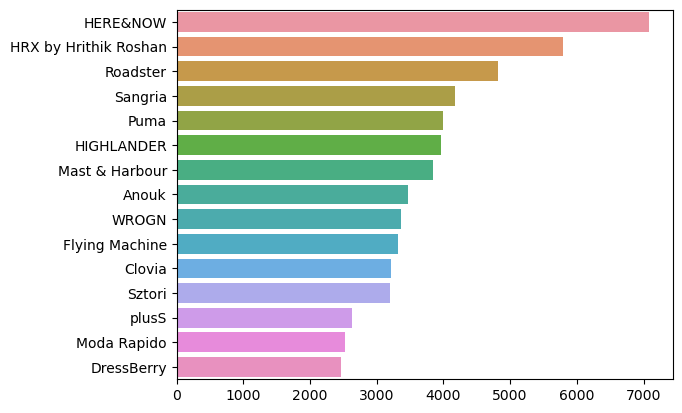

In [80]:
## bivariate analysis

sns.barplot(x=data['OriginalPrice (in Rs)'].value_counts().head(15).values,
            y=data['BrandName'].value_counts().head(15).index)

In [82]:
## further analysis can be done for a single brand

df1=data[data['BrandName']=='HERE&NOW']

([<matplotlib.patches.Wedge at 0x1d725891a00>,
 [Text(0.8215200993241277, 0.7315085279109708, 'kurtas'),
  Text(-0.4910961508129699, 0.9842888654539809, 'jeans'),
  Text(-1.0979830827550852, 0.06658190432572444, 'tshirts'),
  Text(-0.8691176909239199, -0.6742658521110748, 'sweatshirts'),
  Text(-0.43710008429130515, -1.0094273209659692, 'tops'),
  Text(0.0701020652306147, -1.0977639547964775, 'kurta-sets'),
  Text(0.5057689016990664, -0.976830496081137, 'jackets'),
  Text(0.8147089118603688, -0.7390868615631685, 'dresses'),
  Text(1.0006691537166597, -0.45679453236656026, 'shirts'),
  Text(1.08896020467983, -0.15545312034071015, 'track-pants')],
 [Text(0.4481018723586151, 0.39900465158780224, '23.16%'),
  Text(-0.2678706277161654, 0.5368848357021713, '18.42%'),
  Text(-0.5988998633209555, 0.03631740235948606, '14.92%'),
  Text(-0.4740641950494108, -0.3677813738787681, '8.01%'),
  Text(-0.23841822779525731, -0.5505967205268922, '7.98%'),
  Text(0.038237490125789836, -0.5987803389798968,

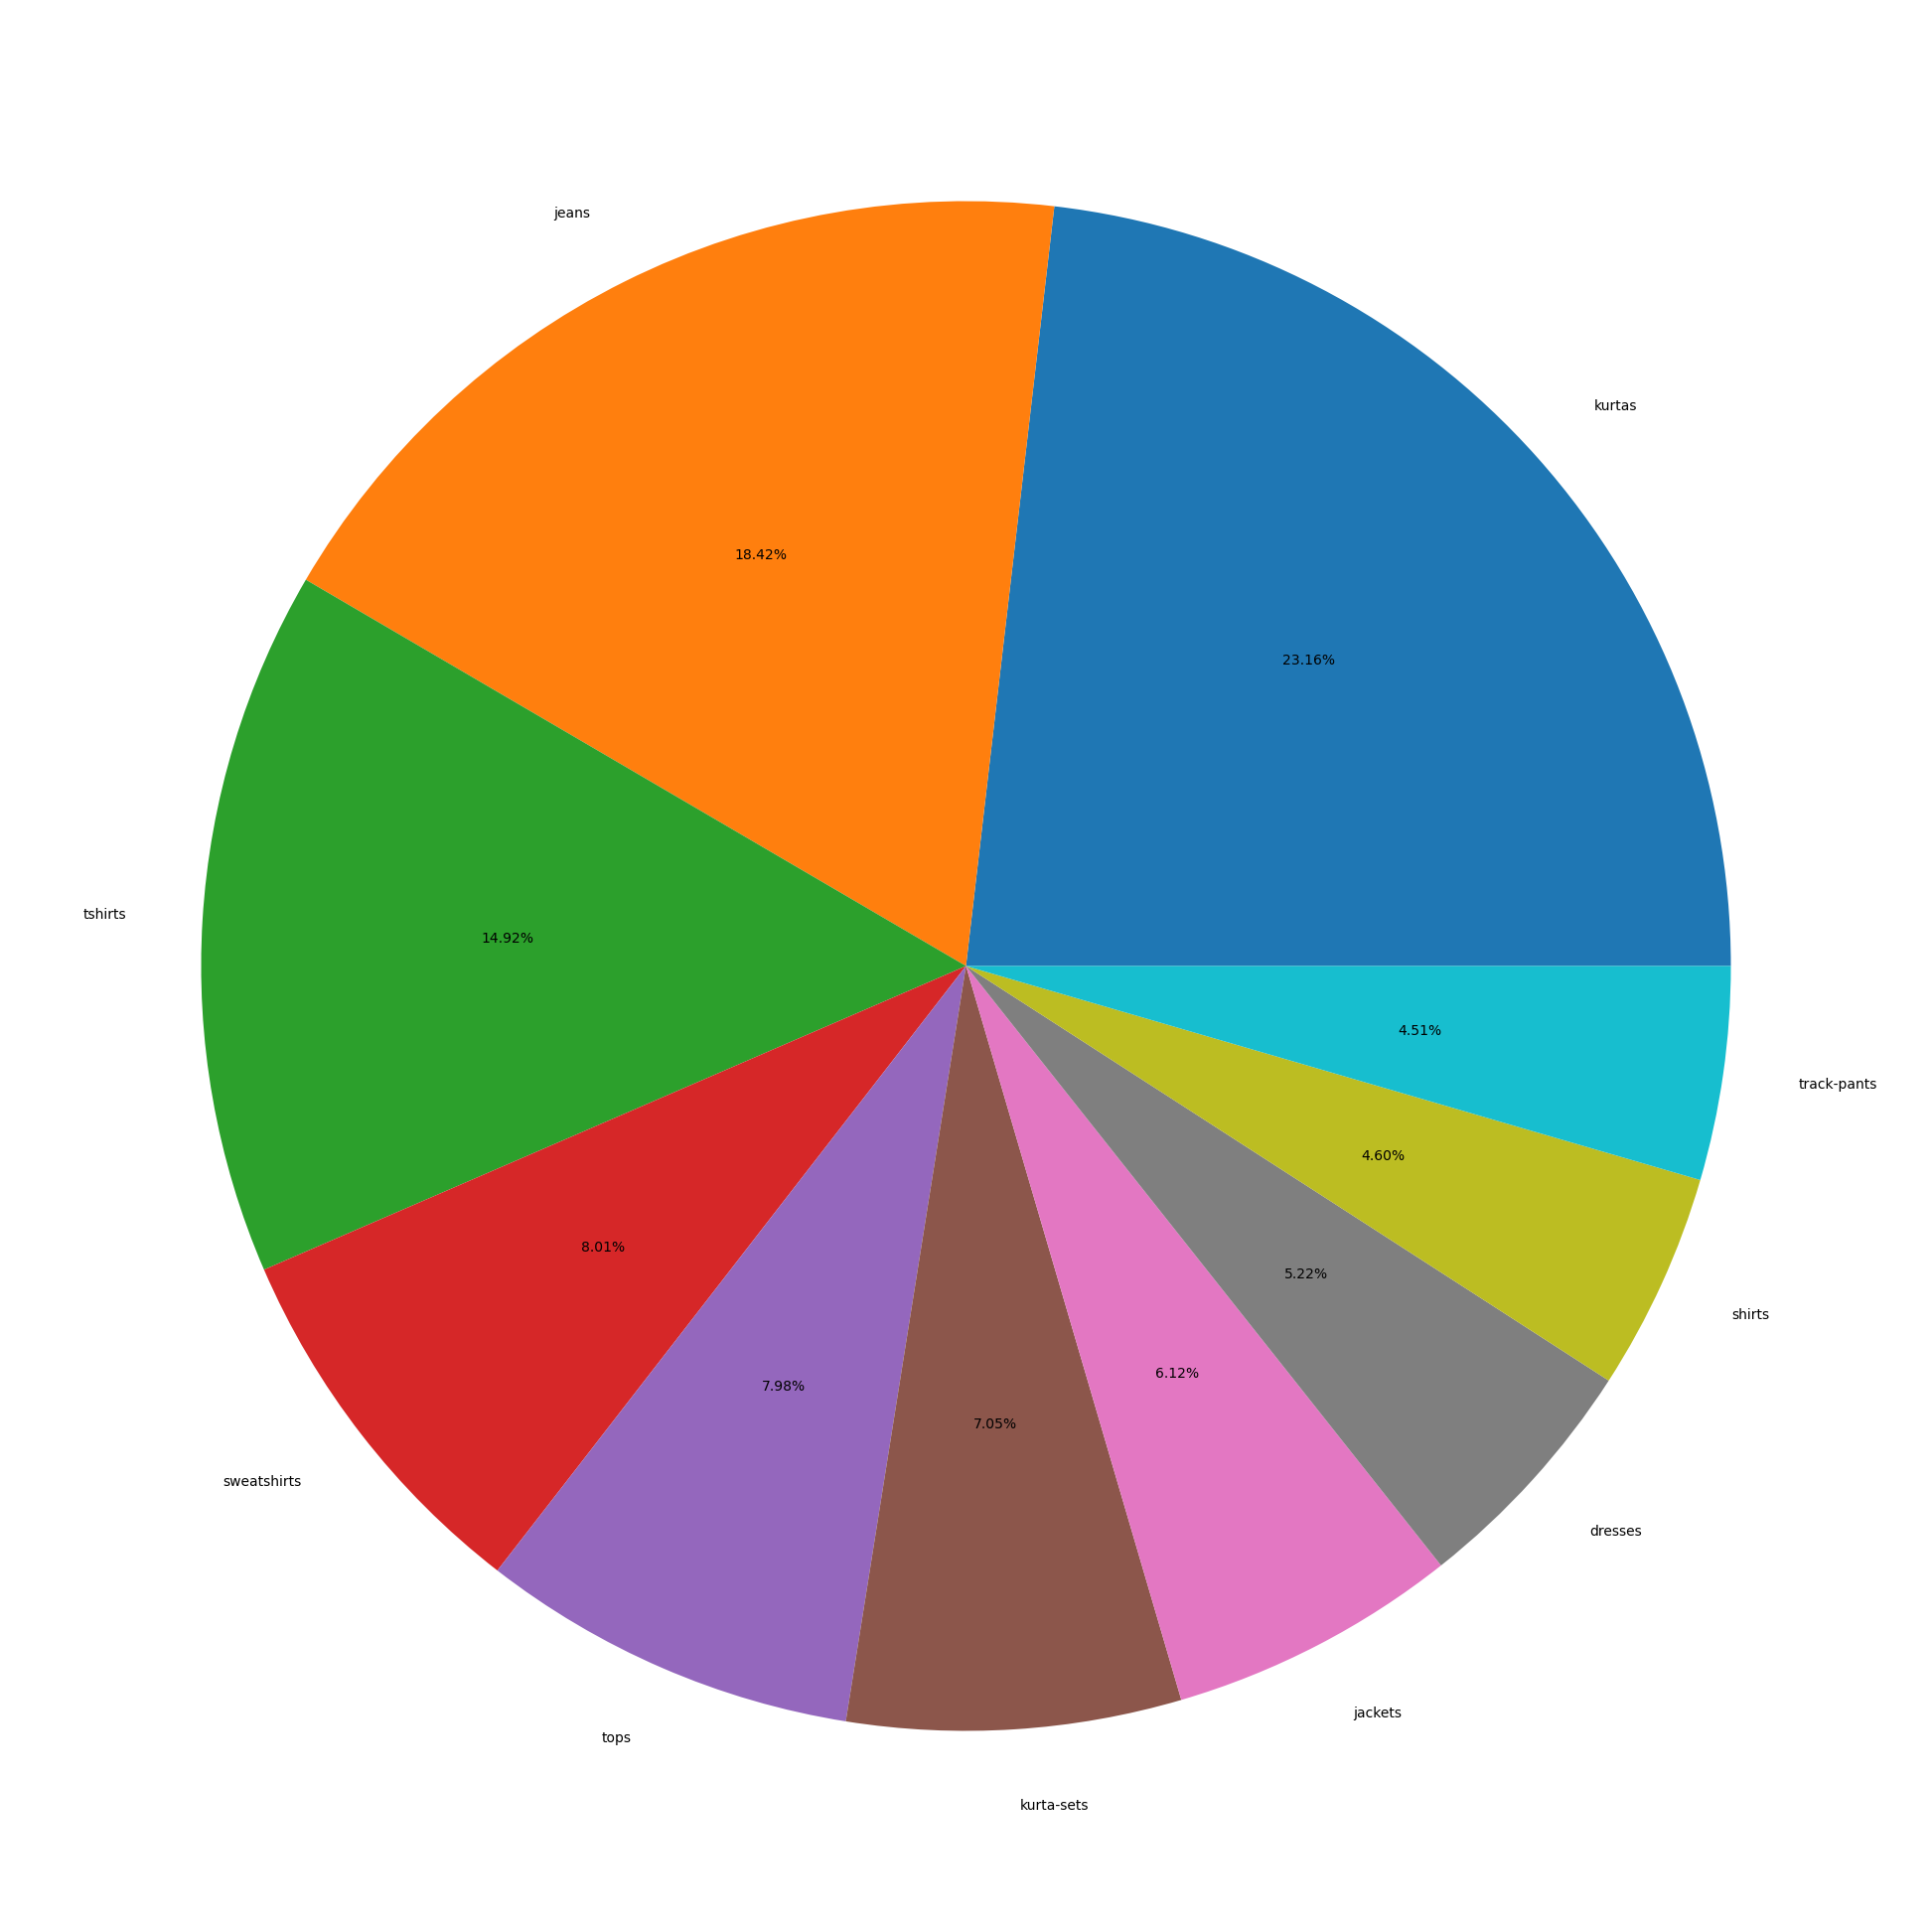

In [88]:
## different categories in here and now
plt.figure(figsize=(30,25))
x=df1['Individual_category'].value_counts().head(10).values
y=df1['Individual_category'].value_counts().head(10).index

plt.pie(x,labels=y,autopct='%1.2f%%')

In [ ]:
## things that can be done further

## category vs brand
## individual category vs brand
## gender wise category